# **Laboratorio N°4: Número de Condición**


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert


## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

Esta propiedad es falsa.

In [36]:
A=np.array([[2,2],[-1,0]])
B=np.array([[1,0],[0,-1]])
condA=np.linalg.cond(A)
condB=np.linalg.cond(B)
C=A+B
condC=np.linalg.cond(C)
print(condA, condB, condA+condB, condC)


4.265564437074638 1.0 5.265564437074638 14.933034373659252


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

Esta propiedad es falsa.

In [37]:
A=np.array([[2,2],[-1,0]])
B=np.array([[1,0],[0,-1]])
condA=np.linalg.cond(A)
condB=np.linalg.cond(B)
C=A-B
condC=np.linalg.cond(C)
print(condA, condB, condA-condB, condC)

4.265564437074638 1.0 3.265564437074638 1.767591879243997


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

Esta es verdadera

In [38]:
A=np.array([[2,2],[-1,0]])
B=np.array([[1,0],[0,-1]])
condA=np.linalg.cond(A)
condB=np.linalg.cond(B)
C=A@B
condC=np.linalg.cond(C)
print(condA, condB, condA*condB, condC)

4.265564437074638 1.0 4.265564437074638 4.265564437074638


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [26]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_A(n):
  A=(1/n)*np.eye(n,k=0)
  A[0,n-1]=n**2
  A[n-1,0]=1
  return A

def matriz_H(n):
  C=np.eye(n,k=0)
  inicio=0
  for i in range(len(C)):
    for j in range(len(C)):
      C[i,j]=(1)/(inicio+1+j)
    inicio+=1

  return C
print(matriz_H(4))

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

Text(0.5, 1.0, 'Grafico de V, BV, AV y HV')

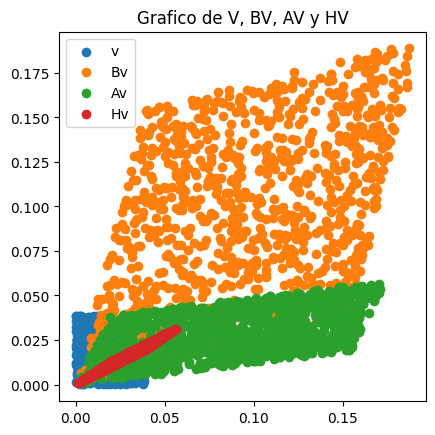

In [54]:
B = matriz_B(2)
A= matriz_A(2)
H=matriz_H(2)
V = np.random.rand(2, 1000)
V=V/np.linalg.norm(V)

AV = A @ V
BV = B @ V
HV = H @ V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.scatter(AV[0], AV[1], label="Av")
plt.scatter(HV[0], HV[1], label="Hv")


plt.legend()
plt.gca().set_aspect('equal')
plt.title("Grafico de V, BV, AV y HV")


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [76]:
def vector_condicion(M, N):
  res=[]
  for i in range(1,N):
    Mn=M(i)
    cond_i=np.linalg.cond(Mn)
    res.append(cond_i)
  return res



**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


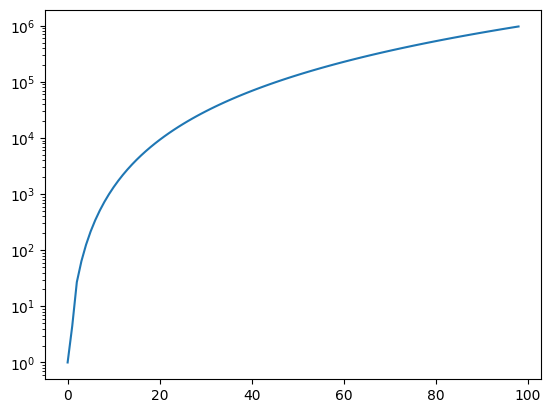

In [94]:
n=100
graf_H=vector_condicion(matriz_H,n)
graf_A=vector_condicion(matriz_A,n)
graf_B=vector_condicion(matriz_B,n)
graf_hil=vector_condicion(hilbert,n)

plt.plot(graf_A)
plt.yscale('log')
plt.show()

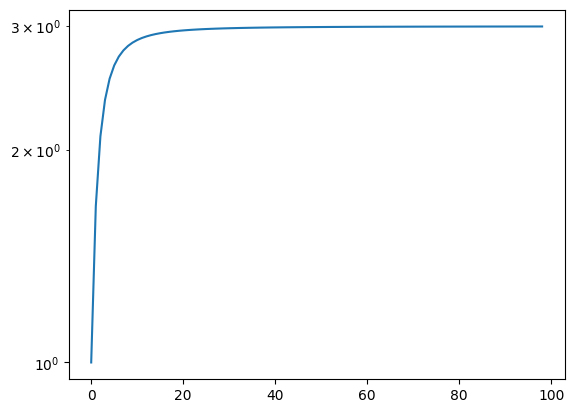

In [86]:

plt.plot(graf_B)
plt.yscale('log')
plt.show()


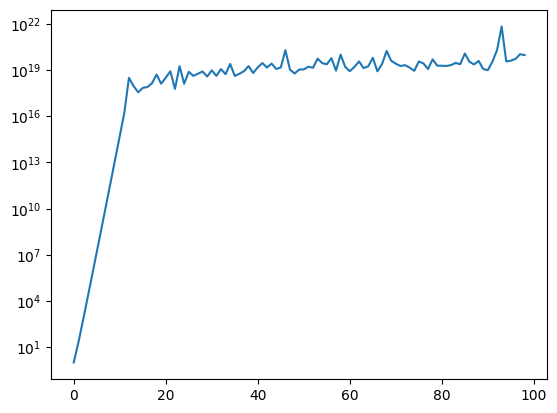

In [97]:
plt.plot(graf_H)
plt.yscale('log')

plt.show()


**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

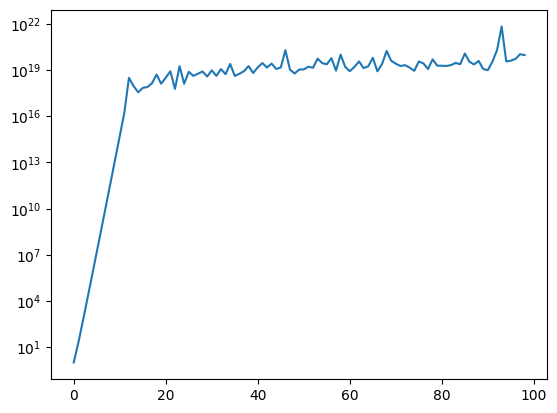

In [98]:
plt.plot(graf_hil)
plt.yscale('log')
plt.show()

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 4/5]])

(a) Calcular $Cond_\infty(A)$.


In [ ]:
#COMPLETAR

(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR